<a href="https://colab.research.google.com/github/iamharkirat/STP-540-Computational-Statistics/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROBLEM 1: 
* code up stochastic gradient descent for the logit problem. Try it on a problem with several x features.


In [91]:
import numpy as np
import matplotlib.pyplot as plt

# simulate data
np.random.seed(123)
n = 1000
p = 3
X = np.random.randn(n, p)
beta_true = np.random.randn(p)
y = np.random.binomial(1, 1 / (1 + np.exp(-X @ beta_true)))

# define logit function
def logit(X, beta):
    return 1 / (1 + np.exp(-X @ beta))

# stochastic gradient descent
def sgd_logit(X, y, alpha=0.1, epochs=100):
    n, p = X.shape
    beta = np.zeros(p)
    beta_hist = np.zeros((epochs, p))
    for epoch in range(epochs):
        for i in range(n):
            xi = X[i, :]
            yi = y[i]
            grad = (yi - logit(xi, beta)) * xi
            beta += alpha * grad
        beta_hist[epoch, :] = beta
    return beta, beta_hist

# run stochastic gradient descent
beta_hat, beta_hist = sgd_logit(X, y)

# print results
print("True beta: ", beta_true)
print("Estimated beta: ", beta_hat)

True beta:  [-0.45059869  0.60959032  1.17374438]
Estimated beta:  [-0.54946233  0.65910012  1.70198771]


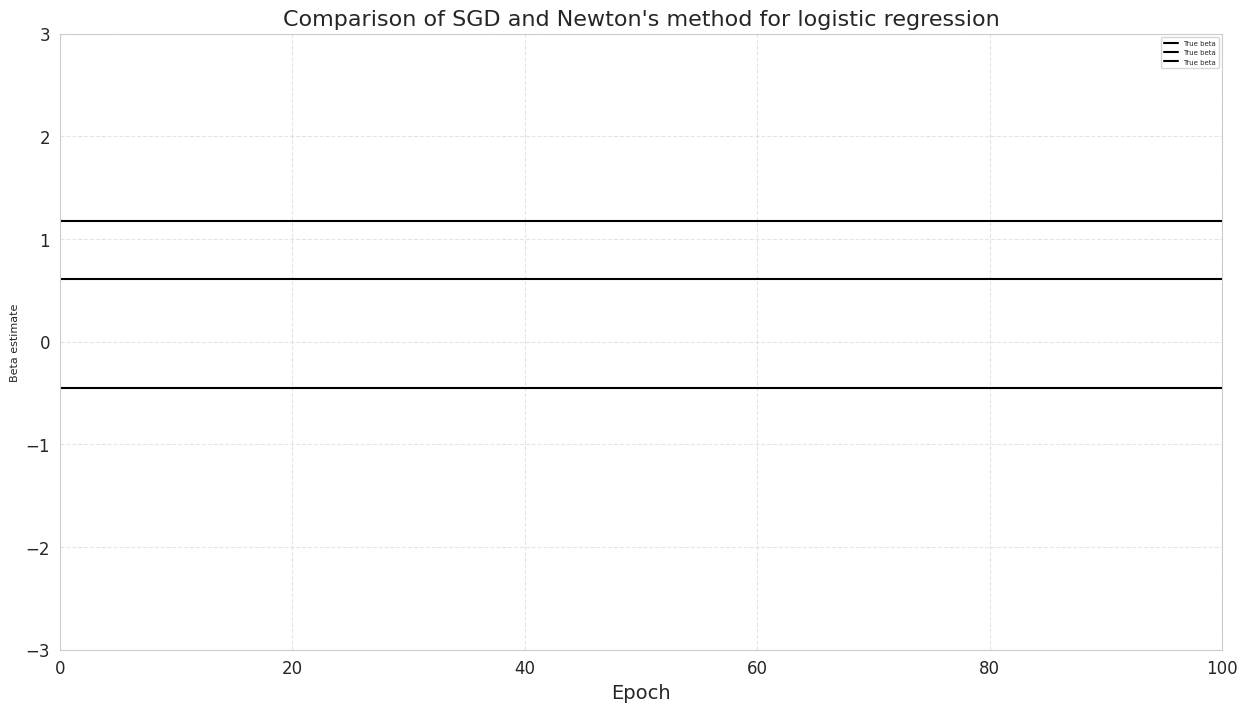

In [92]:
# plot parameter estimates over epochs
plt.figure(figsize=(15, 8))

# plot true beta values
plt.plot([0, 100], [beta_true, beta_true], 'k-', linewidth=1.5, label='True beta')

# add separate legends for each method
plt.legend(loc='upper right', fontsize=5)
plt.xlim(0, 100)
plt.ylim(-3, 3)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Beta estimate', fontsize=8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.5, linestyle='--')
plt.title('Comparison of SGD and Newton\'s method for logistic regression', fontsize=16)
plt.show()

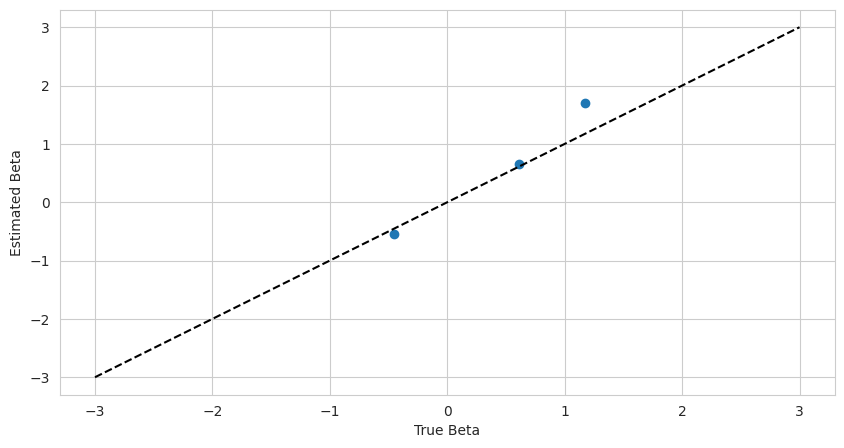

In [93]:
# plot true beta vs estimated beta
fig, ax = plt.subplots()
ax.scatter(beta_true, beta_hat)
ax.plot([-3, 3], [-3, 3], color="black", linestyle="--")
ax.set_xlabel("True Beta")
ax.set_ylabel("Estimated Beta")
plt.show()

## PROBLEM 2
* code up stochastic gradient descent for the logit problem with momentum. Compare with what you got in the previous part.
code up Newton’s method for the logit problem. Compare with what you got in the previous two parts.

In [94]:
# To implement stochastic gradient descent with momentum, we need to modify the 
# sgd_logit function to include an additional parameter for the momentum coefficient 
# and initialize a variable to store the momentum for each parameter. 

def sgd_logit_momentum(X, y, alpha=0.1, epochs=100, momentum=0.9):
    n, p = X.shape
    beta = np.zeros(p)
    beta_hist = np.zeros((epochs, p))
    v = np.zeros(p)  # initialize momentum
    for epoch in range(epochs):
        for i in range(n):
            xi = X[i, :]
            yi = y[i]
            grad = (yi - logit(xi, beta)) * xi
            v = momentum * v + (1 - momentum) * grad  # update momentum
            beta += alpha * v  # update parameter estimates with momentum
        beta_hist[epoch, :] = beta
    return beta, beta_hist

In [95]:
# run stochastic gradient descent with momentum
beta_hat_mom, beta_hist_mom = sgd_logit_momentum(X, y)

# compare parameter estimates
print("True beta: ", beta_true)
print("Estimated beta without momentum: ", beta_hat)
print("Estimated beta with momentum: ", beta_hat_mom)

True beta:  [-0.45059869  0.60959032  1.17374438]
Estimated beta without momentum:  [-0.54946233  0.65910012  1.70198771]
Estimated beta with momentum:  [-0.51880105  0.61903787  1.61140109]


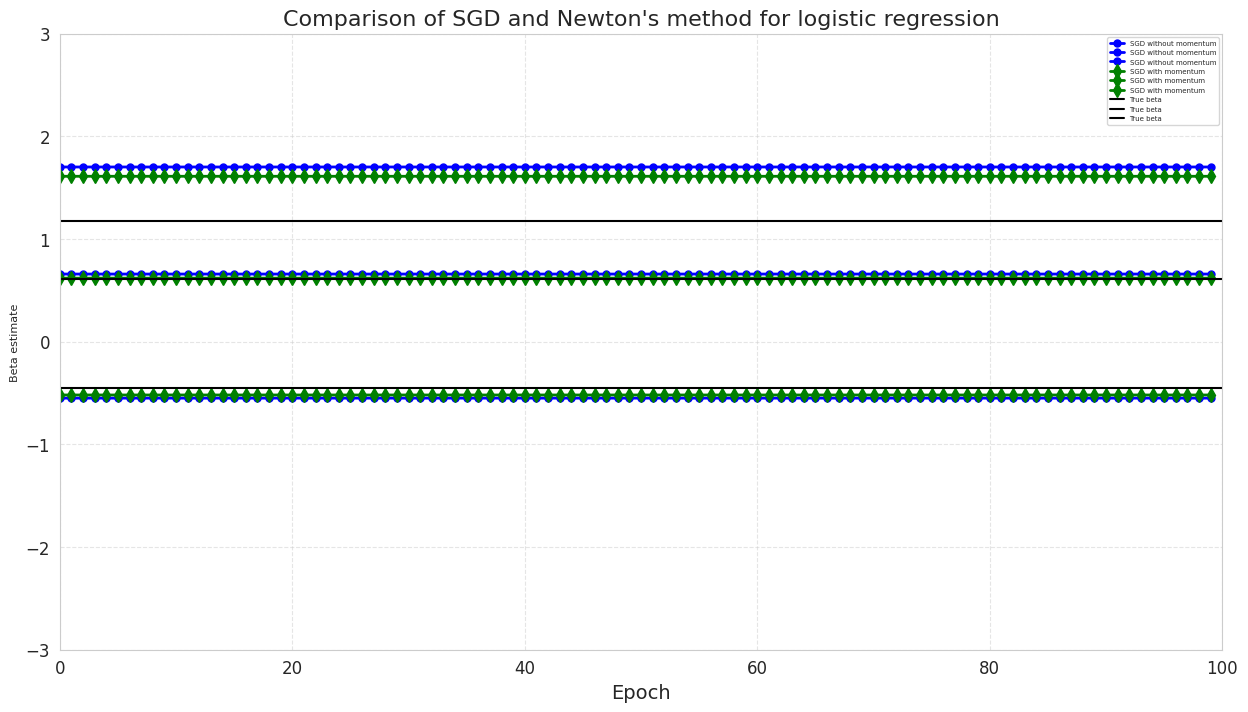

In [96]:
# plot parameter estimates over epochs
plt.figure(figsize=(15, 8))

# plot beta estimates 
plt.plot(beta_hist, linewidth=2, linestyle='-', color='blue', marker='o', markersize=5, label='SGD without momentum')
plt.plot(beta_hist_mom, linewidth=2, linestyle='-', color='green', marker='d', markersize=7, label='SGD with momentum')

# plot true beta values
plt.plot([0, 100], [beta_true, beta_true], 'k-', linewidth=1.5, label='True beta')

# add separate legends for each method
plt.legend(loc='upper right', fontsize=5)
plt.xlim(0, 100)
plt.ylim(-3, 3)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Beta estimate', fontsize=8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.5, linestyle='--')
plt.title('Comparison of SGD and Newton\'s method for logistic regression', fontsize=16)
plt.show()

## PROBLEM 3
* code up Newton’s method for the logit problem. Compare with what you got in the previous two parts.

In [97]:
# Newton's method
def newton_logit(X, y, max_iter=100):
    n, p = X.shape
    beta = np.zeros(p)
    beta_hist = np.zeros((max_iter, p))
    for i in range(max_iter):
        mu = logit(X, beta)
        grad = X.T @ (y - mu)
        H = X.T @ np.diag(mu * (1 - mu)) @ X
        beta += np.linalg.solve(H, grad)
        beta_hist[i, :] = beta
    return beta, beta_hist

# run Newton's method
beta_hat_newton, beta_hist_newton = newton_logit(X, y)

# print results
print("True beta: ", beta_true)
print("Estimated beta (SGD): ", beta_hat)
print("Estimated beta (SGD with momentum): ", beta_hat_mom)
print("Estimated beta (Newton's method): ", beta_hat_newton)

True beta:  [-0.45059869  0.60959032  1.17374438]
Estimated beta (SGD):  [-0.54946233  0.65910012  1.70198771]
Estimated beta (SGD with momentum):  [-0.51880105  0.61903787  1.61140109]
Estimated beta (Newton's method):  [-0.46496462  0.58699323  1.26206675]


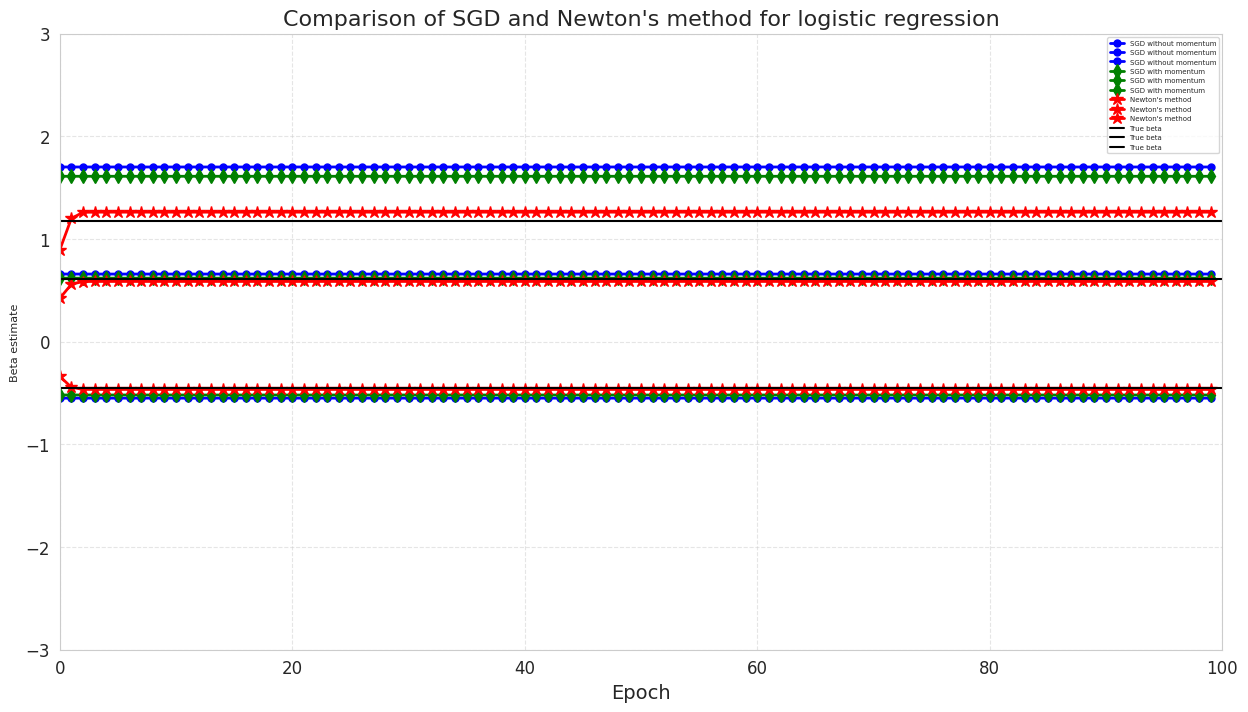

In [98]:
# plot parameter estimates over epochs
plt.figure(figsize=(15, 8))

# plot beta estimates 
plt.plot(beta_hist, linewidth=2, linestyle='-', color='blue', marker='o', markersize=5, label='SGD without momentum')
plt.plot(beta_hist_mom, linewidth=2, linestyle='-', color='green', marker='d', markersize=7, label='SGD with momentum')
plt.plot(beta_hist_newton, linewidth=2, linestyle='-', color='red', marker='*', markersize=9, label="Newton's method")

# plot true beta values
plt.plot([0, 100], [beta_true, beta_true], 'k-', linewidth=1.5, label='True beta')

# add separate legends for each method
plt.legend(loc='upper right', fontsize=5)
plt.xlim(0, 100)
plt.ylim(-3, 3)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Beta estimate', fontsize=8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.5, linestyle='--')
plt.title('Comparison of SGD and Newton\'s method for logistic regression', fontsize=16)
plt.show()